# Universal Dependencies Treebank Analysis

This notebook provides a comprehensive framework for analyzing **Universal Dependencies (UD) treebanks** using both traditional and modern computational approaches. It demonstrates how to extract linguistic insights from syntactically annotated corpora, making it particularly valuable for Digital Humanities researchers studying language structure, change, and variation.

## What are Universal Dependencies?

**Universal Dependencies** is a framework for cross-linguistically consistent grammatical annotation. UD treebanks contain rich linguistic information including:

- **Part-of-Speech tags**: Grammatical categories (NOUN, VERB, ADJ, etc.)
- **Morphological features**: Detailed grammatical properties (Number, Gender, Tense, etc.)
- **Dependency relations**: Syntactic connections between words (subject, object, modifier, etc.)
- **Lemmatization**: Dictionary forms of words
- **Enhanced dependencies**: Additional semantic relationships

## Why Analyze Treebanks?

Treebank analysis enables researchers to:

### **Descriptive Linguistics**
- Document grammatical patterns in a language systematically
- Identify frequency distributions of linguistic phenomena
- Compare structural features across languages or varieties

### **Historical Linguistics** 
- Track grammatical changes over time periods
- Identify evolving syntactic constructions
- Study morphological simplification or complexification

### **Digital Humanities Applications**
- **Stylistics**: Compare syntactic complexity across authors or genres
- **Authorship Attribution**: Use grammatical patterns as evidence
- **Translation Studies**: Analyze structural differences between source and target texts
- **Corpus Linguistics**: Extract large-scale patterns from annotated text collections

## What You'll Learn

1. **Data Exploration**: Understanding UD annotation structure and content
2. **Descriptive Statistics**: Computing frequency distributions and basic metrics
3. **Complexity Analysis**: Measuring syntactic and morphological complexity
4. **Graph Theory Applications**: Treating sentences as mathematical graphs
5. **Lexical Richness**: Measuring vocabulary diversity and growth patterns
6. **Pattern Mining**: Discovering frequent syntactic constructions
7. **Visualization**: Creating compelling graphics for linguistic patterns
8. **Comparative Analysis**: Systematic comparison across corpora or languages

## Analytical Approaches Demonstrated

### **Traditional Metrics**
- **Sentence length distributions**: Measuring syntactic complexity
- **POS tag frequencies**: Understanding grammatical profiles
- **Morphological feature analysis**: Exploring grammatical richness

### **Graph-Theoretic Analysis**
- **Tree depth**: Measuring hierarchical complexity
- **Branching factors**: Understanding structural density
- **Projectivity**: Identifying crossing dependencies

### **Information-Theoretic Measures**
- **Type-Token Ratios**: Vocabulary diversity metrics
- **Lexical growth patterns**: Heaps' law and vocabulary accumulation

### **Modern Computational Approaches**
- **N-gram taggers**: Implementing and evaluating traditional POS taggers
- **Neural models**: Comparing with state-of-the-art approaches
- **Transformer fine-tuning**: Adapting modern models for specific languages

## Applications in Digital Humanities Research

### **Literary Analysis**
- Compare syntactic complexity across different authors or time periods
- Identify characteristic grammatical patterns of literary genres
- Study evolution of prose style in historical collections

### **Historical Language Study**
- Track grammatical changes in diachronic corpora
- Document language contact effects in multilingual communities
- Analyze standardization processes in written languages

### **Sociolinguistic Research**
- Compare grammatical features across social groups or registers
- Study formal vs. informal writing styles
- Analyze language variation in digital communications

### **Computational Philology**
- Standardize grammatical analysis across manuscript traditions
- Identify linguistic evidence for dating and attribution
- Support critical edition preparation with grammatical analysis

## Prerequisites

Before running this notebook, ensure you have:
- **Python packages**: `datasets`, `pandas`, `matplotlib`, `networkx`, `nltk`
- **NLTK data**: punkt tokenizer, averaged_perceptron_tagger
- **Optional**: LughaatNLP for Urdu-specific processing
- **Hardware**: Standard laptop/desktop (no special requirements)

## Key Concepts

- **Dependency parsing**: Representing sentence structure as directed graphs
- **Universal POS tags**: Cross-linguistically consistent grammatical categories  
- **Morphological features**: Detailed grammatical properties beyond basic POS
- **Projectivity**: Mathematical property of dependency trees
- **Lexical diversity**: Measures of vocabulary richness and complexity
- **N-gram models**: Statistical approaches to sequence prediction

## Configuration and Data Loading

This section sets up the analysis environment and loads the Universal Dependencies data for processing.

In [37]:
EN_LANGUAGE = 'en_ewt'
UR_LANGUAGE = 'ur_udtb'

### Language Selection

The notebook is configured to analyze either English or Urdu Universal Dependencies data:

- **`EN_LANGUAGE = 'en_ewt'`**: English Web Treebank (news, blogs, reviews, emails)
- **`UR_LANGUAGE = 'ur_udtb'`**: Urdu Universal Dependencies Treebank

**For Digital Humanities researchers**:
- **English EWT**: Good for analyzing modern web-based discourse, informal writing styles
- **Urdu UDTB**: Valuable for South Asian language studies, morphologically rich language analysis
- **Easy modification**: Change the active language by modifying which dataset is loaded in the next cell

### Sample Sentence Analysis

This cell examines a single sentence in detail to understand the annotation structure and demonstrate the rich linguistic information available in UD treebanks.

In [45]:
from datasets import load_dataset
ud = load_dataset("universal_dependencies", UR_LANGUAGE)
train = ud["train"]
print(train)

Dataset({
    features: ['idx', 'text', 'tokens', 'lemmas', 'upos', 'xpos', 'feats', 'head', 'deprel', 'deps', 'misc'],
    num_rows: 4043
})


## Descriptive Statistics and Frequency Analysis

This section computes fundamental distributional statistics to understand the grammatical profile of the corpus.

### Inspect Features of First Sentence


### Universal POS Tag Distribution Analysis

This visualization reveals the grammatical character of the corpus by showing the frequency of each Universal POS category.

#### **Reading the Chart**
- **Y-axis**: Raw token counts across the entire corpus
- **X-axis**: Universal POS categories sorted by frequency
- **Pattern**: Shows which grammatical categories dominate the language sample

#### **Key Insights for Digital Humanities**

**Corpus Characterization**:
- **High NOUN frequency**: Indicates descriptive, entity-rich text (typical of news/informational genres)
- **PUNCT prominence**: Reflects complex sentence structures and formal writing style
- **VERB frequency**: Shows the action-oriented nature of the content

**Cross-linguistic Comparison**:
- Compare these distributions across different languages or time periods
- Identify genre-specific grammatical patterns
- Track historical changes in grammatical frequency

**Methodological Implications**:
- **Rare categories** (INTJ, SYM): May need special handling in computational models
- **Dominant categories** (NOUN, VERB): Form the core of the language's grammatical system
- **Balanced distribution**: Suggests comprehensive, natural language representation

**For Stylistic Analysis**:
Different authors, genres, or time periods show characteristic POS distributions. This baseline helps identify:
- Formal vs. informal registers
- Descriptive vs. narrative styles  
- Contemporary vs. historical language patterns

In [43]:
toklist = train[209]
for k, v in toklist.items():
    print(f"{k}: {v}")


idx: weblog-juancole.com_juancole_20040604210986_ENG_20040604_210986-0006
text: Ironically, among the strongest proponents of war in Iraq were Israeli Prime Minister Ariel Sharon and his neoconservative supporters in the US.
tokens: ['Ironically', ',', 'among', 'the', 'strongest', 'proponents', 'of', 'war', 'in', 'Iraq', 'were', 'Israeli', 'Prime', 'Minister', 'Ariel', 'Sharon', 'and', 'his', 'neoconservative', 'supporters', 'in', 'the', 'US', '.']
lemmas: ['ironically', ',', 'among', 'the', 'strongest', 'proponent', 'of', 'war', 'in', 'Iraq', 'be', 'israeli', 'Prime', 'Minister', 'Ariel', 'Sharon', 'and', 'he', 'neoconservative', 'supporter', 'in', 'the', 'US', '.']
upos: [14, 1, 2, 8, 6, 0, 2, 0, 2, 10, 17, 6, 10, 10, 10, 10, 9, 11, 6, 0, 2, 8, 10, 1]
xpos: ['RB', ',', 'IN', 'DT', 'JJS', 'NNS', 'IN', 'NN', 'IN', 'NNP', 'VBD', 'JJ', 'NNP', 'NNP', 'NNP', 'NNP', 'CC', 'PRP$', 'JJ', 'NNS', 'IN', 'DT', 'NNP', '.']
feats: ['None', 'None', 'None', "{'Definite': 'Def', 'PronType': 'Art'}", "

## 2. Descriptive Statistics


### Dependency Relations Analysis

This chart shows the frequency of syntactic relationships in the corpus, revealing how words connect to form meaningful structures.

#### **Understanding Dependency Relations**

**Most Frequent Relations**:
- **`case`**: Prepositions and postpositions marking noun relationships
- **`compound`**: Multi-word expressions and compound nouns  
- **`nmod`**: Noun modifiers (including prepositional phrases)
- **`amod`**: Adjectival modifiers

#### **Linguistic Insights**

**Syntactic Complexity**:
- High `case` frequency indicates extensive use of prepositional phrases
- Frequent `compound` suggests rich nominal morphology
- `nmod` and `amod` patterns show how languages build complex noun phrases

**Language-Specific Patterns**:
- Some relations appear much more frequently in certain languages
- Word order preferences affect relation frequencies
- Morphological richness influences modifier patterns

#### **Applications in Digital Humanities**

**Authorship Studies**:
- Different authors may favor different syntactic constructions
- Dependency relation patterns can serve as stylistic fingerprints
- Compare relation frequencies across suspected authorial works

**Historical Language Change**:
- Track evolution of syntactic preferences over time
- Document grammaticalization processes
- Study language contact effects on syntax

**Genre Analysis**:
- Academic vs. literary writing shows different relation patterns
- Formal vs. informal registers use different syntactic strategies
- Technical writing may show distinctive dependency patterns

**Cross-linguistic Comparison**:
- Compare relation frequencies across related languages
- Identify typological patterns in syntactic organization
- Study translation effects on syntactic structure

In [ ]:
## Morphological Feature Analysis

This section analyzes the detailed morphological properties encoded in the Universal Dependencies features.

This bar chart is simply the raw counts of each Universal POS tag across your entire training split.  Here’s how to read it and what it tells you about your data:

1. **X-axis**: The UPOS tag (e.g. NOUN, VERB, ADP, etc.).
2. **Y-axis**: How many tokens in the corpus received that tag.

---

### Key Observations

* **NOUN is by far the most frequent tag (\~35 000 tokens).**
  This makes sense in a news/blog‐style corpus—there are lots of entities, objects, subjects.

* **PUNCT is the second most frequent (\~23 500).**
  Even though punctuation carries no “meaning” per se, UD counts commas, periods, colons, etc., as tokens.  A high punctuation count means many clauses, lists, appositives and complex sentences.

* **VERB (\~23 000) & PROPN (\~13 000)**
  Verbs are the next most common content words (actions/events), and PROPN (proper nouns) reflects lots of names and named entities.

* **Function words (PRON, ADP, DET, AUX, CCONJ, SCONJ, PART)**
  Together these closed-class words are very frequent—English relies heavily on pronouns, prepositions, determiners, auxiliaries, conjunctions, etc.

* **Rare tags (NUM, INTJ, SYM)**
  Numerals, interjections, and symbols are comparatively scarce (< 5 000), again matching the formal, news-like register of the EWT treebank.

---

### What We Can Conclude

1. **Domain Character:**
   A noun-heavy, proper-name-rich, punctuation-dense corpus—typical for web-news content.

2. **Modeling Implications:**

   * You’ll need strong handling of **noun phrases** (e.g. noun attachment decisions).
   * **Punctuation** parsing (punct edges) is non-trivial—many tokens to classify.
   * **Tag imbalance**: VERY common tags like NOUN/VERB vs. rare ones like INTJ may require smoothing or class weighting if you train your own tagger or parser.

3. **Preprocessing Tips:**

   * Often people **filter out** PUNCT before certain downstream tasks (e.g. topic modeling, NER).
   * You might **collapse** very rare tags into an <OTHER> category when fine-tuning small models.

4. **Corpus Complexity:**
   The relative heights suggest a balanced mix of open-class (content) vs. closed-class (function) words—roughly half of the tokens carry “meaning” (NO­UN, VERB, ADJ, ADV, PROPN) and half glue the sentences together.

---

## Syntactic Complexity Analysis

This section measures various aspects of syntactic complexity including sentence length distributions and tree structural properties.

## Dependency Relations

In a dependency‐parsed sentence, every word (token) is connected to exactly one “head” word by a directed, labeled edge.  The **label** on that edge is the **dependency relation** (or **deprel**), and it tells you *what kind* of grammatical or semantic link holds between the dependent and its head.

---

### What Are Dependency Relations?

Think of a sentence like:

> “American forces killed the preacher at the mosque.”

A simplified dependency parse might look like:

```
       ┌── nsubj ─ American
  root ─┤
(killed)└── obj ─ forces
           └─ det ─ the
           └─ nmod ─ preacher
                     └─ case ─ at
                     └─ det ─ the
                     └─ nmod ─ mosque
```

Here, each arrow is labeled:

* **nsubj** (nominal subject): links “American” → “killed” (who did the killing?)
* **obj** (direct object): links “forces” → “killed” (what was acted on?)
* **det** (determiner): links “the” → “preacher” (which preacher?)
* **nmod** (nominal modifier): links “preacher” → “killed” indirectly via “obj” (the preacher is the thing killed)
* **case** (case marker): links “at” → “mosque” (shows the preposition relationship)

Universal Dependencies defines a standard inventory of about 40–50 such relations (plus language-specific extensions).  A few common ones are:

| Relation     | What it marks                                     | Example                                 |
| ------------ | ------------------------------------------------- | --------------------------------------- |
| **nsubj**    | nominal subject of a clause                       | *Dogs* bark → *nsubj(dogs, bark)*       |
| **obj**      | direct object of a verb                           | eat *apples* → *obj(apples, eat)*       |
| **iobj**     | indirect object                                   | give *her* a gift → *iobj(her, give)*   |
| **amod**     | adjectival modifier                               | *big* house → *amod(big, house)*        |
| **nmod**     | noun modifier (often with a preposition)          | in *the city* → *nmod(city, in)*        |
| **case**     | preposition or postposition marking a noun’s case | *to* John → *case(to, John)*            |
| **compound** | compounds (e.g., multiword nouns)                 | New *York* City → *compound(York, New)* |
| **aux**      | auxiliary verbs                                   | has *been* eaten → *aux(been, eaten)*   |
| **punct**    | punctuation                                       | the house\*.→*punct(., house)*          |
| **root**     | the top of the tree (head’s head, index 0)        | main verb or predicate                  |

---

## Graph-Theoretic Analysis

This section applies mathematical graph theory to analyze the structural properties of dependency trees.

<Axes: title={'center': 'Top 20 Dependency Relations'}>

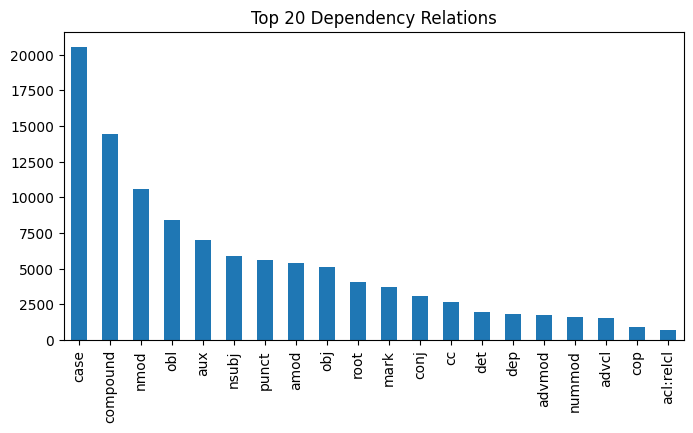

In [29]:
# Dependency relation distribution
deprel_counts = Counter(rel for sent in train for rel in sent['deprel'])
pd.Series(dict(deprel_counts)).sort_values(ascending=False).head(20).plot.bar(figsize=(8,4), title='Top 20 Dependency Relations')


### Branching Factor and Projectivity Analysis

These metrics provide mathematical insights into the structural organization of syntax in the corpus.

#### **Average Branching Factor (~2.50)**

**Definition**: Average number of direct dependents (children) per word across all sentences.

**Linguistic Interpretation**:
- **Value of 2.5**: Each word governs approximately 2-3 other words on average
- **Moderate complexity**: Neither extremely flat nor highly hierarchical structure
- **Natural range**: Typical for human languages (usually 1.5-3.5)

**Implications**:
- **Parsing efficiency**: Moderate branching enables efficient parsing algorithms
- **Cognitive load**: Manageable complexity for human processing
- **Cross-linguistic variation**: Different languages show different branching preferences

#### **Projectivity (100%)**

**Definition**: A tree is projective if no dependency arcs cross when drawn above the sentence.

**Perfect Projectivity (1.0)**:
- **All trees are projective**: No crossing dependencies in the entire corpus
- **Word order constraints**: Reflects relatively fixed word order in the language
- **Parsing implications**: Can use efficient O(n³) projective parsing algorithms

**Significance for Different Languages**:
- **English**: Typically shows high projectivity (95%+)
- **German**: Lower projectivity due to more flexible word order
- **Free word order languages**: May show significant non-projectivity

#### **Digital Humanities Applications**

**Computational Efficiency**:
- **Algorithm choice**: 100% projectivity enables use of faster parsing methods
- **Model architecture**: Can optimize for projective parsing without loss
- **Processing pipeline**: Simpler preprocessing and postprocessing

**Linguistic Typology**:
- **Word order studies**: Projectivity correlates with word order flexibility
- **Language comparison**: Compare projectivity across related languages
- **Historical change**: Track changes in word order flexibility over time

**Stylistic Analysis**:
- **Register differences**: Formal vs. informal writing may show different projectivity
- **Genre characteristics**: Technical writing may be more projective than literary
- **Individual variation**: Some authors may use more complex word orders

**Translation Studies**:
- **Source-target differences**: Languages may differ in projectivity patterns
- **Translation effects**: Translators may impose source language word order
- **Quality assessment**: Unusual projectivity patterns may indicate translation artifacts

#### **Theoretical Implications**

**Psycholinguistic Evidence**:
- **Processing preference**: High projectivity suggests preference for local dependencies
- **Cognitive constraints**: Crossing dependencies may increase processing difficulty
- **Acquisition patterns**: Children may acquire projective structures first

**Formal Grammar**:
- **Grammar complexity**: Projective languages may have simpler formal grammars
- **Parsing theory**: Influences choice of parsing formalism and algorithm
- **Linguistic universals**: Projectivity preferences may reflect universal constraints

## Lexical Richness and Vocabulary Growth

This section analyzes vocabulary diversity patterns and lexical growth characteristics using information-theoretic measures.

## 3. Morphological Feature Analysis


### Type-Token Ratio Growth Analysis

This curve demonstrates how vocabulary diversity changes as more text is processed, revealing fundamental patterns of lexical richness.

#### **Understanding the TTR Curve**

**Shape and Pattern**:
- **Rapid initial decline**: TTR drops quickly from high initial values
- **Gradual stabilization**: Eventually reaches a plateau around 0.09-0.10
- **Characteristic concave shape**: Reflects Heaps' Law (vocabulary grows sublinearly)

**Mathematical Interpretation**:
- **Early stage**: Almost every word is new (high TTR)
- **Middle stage**: Common words start repeating (declining TTR)
- **Late stage**: New words are increasingly rare (stable low TTR)

#### **Linguistic Significance**

**Vocabulary Size Estimation**:
- **Plateau around 0.10**: Suggests ~10,000 unique types in 100,000 tokens
- **Heaps' Law**: Vocabulary grows as V ≈ K × N^β where β ≈ 0.5
- **Practical implications**: Can predict vocabulary growth for larger corpora

**Language Characteristics**:
- **Final TTR value**: Reflects lexical diversity of the language/genre
- **Decline rate**: Shows how quickly common words dominate
- **Plateau stability**: Indicates mature vocabulary sampling

#### **Digital Humanities Applications**

**Authorship Studies**:
- **Individual signatures**: Different authors may show different TTR curves
- **Vocabulary richness**: Compare lexical diversity across authors
- **Style evolution**: Track changes in vocabulary usage over an author's career

**Historical Analysis**:
- **Language change**: Compare TTR curves across time periods
- **Standardization**: Track vocabulary convergence in historical corpora
- **Genre evolution**: Study lexical complexity changes in different text types

**Corpus Design**:
- **Sampling decisions**: Understand how much text is needed for stable vocabulary estimates
- **Size requirements**: Determine appropriate corpus size for research questions
- **Quality assessment**: Evaluate whether corpus captures representative vocabulary

**Cross-linguistic Comparison**:
- **Typological differences**: Languages may show different TTR patterns
- **Morphological complexity**: Rich morphology may affect TTR curves
- **Script differences**: Different writing systems may influence vocabulary growth

#### **Computational Applications**

**Model Training**:
- **Vocabulary size**: Inform decisions about model vocabulary limits
- **Subword tokenization**: Understand trade-offs between coverage and efficiency
- **Out-of-vocabulary handling**: Design strategies for rare words

**Text Generation**:
- **Diversity metrics**: Evaluate generated text for appropriate vocabulary richness
- **Quality assessment**: Compare generated TTR curves with natural text
- **Training targets**: Use TTR as objective function for generation models

#### **Methodological Considerations**

**Corpus Comparability**:
- **Text preprocessing**: Ensure consistent tokenization across comparisons
- **Sampling method**: Random vs. sequential sampling may affect curves
- **Domain effects**: Different text domains show different vocabulary patterns

**Statistical Robustness**:
- **Multiple samples**: Average across different text orderings
- **Confidence intervals**: Quantify uncertainty in TTR estimates
- **Significance testing**: Compare TTR curves statistically across conditions

In [ ]:
## Multiword Expression Analysis

This section examines multiword expressions (MWEs) and fixed expressions in the corpus using Universal Dependencies annotation.

## 4. Complexity Analysis


## Syntactic Pattern Mining

This section discovers frequent syntactic patterns by analyzing head-modifier-dependent triplets across the corpus.

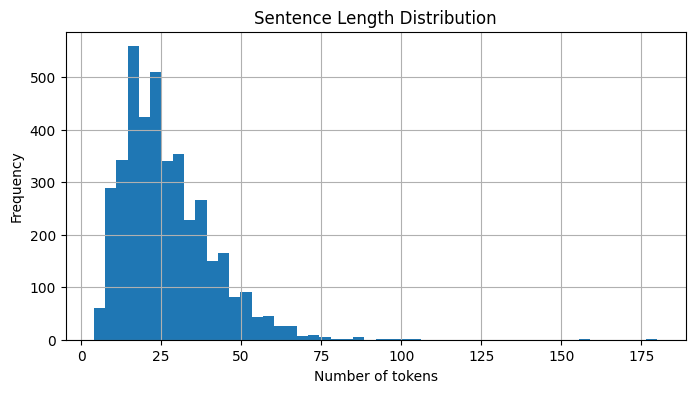

Average length: 26.883502349740294


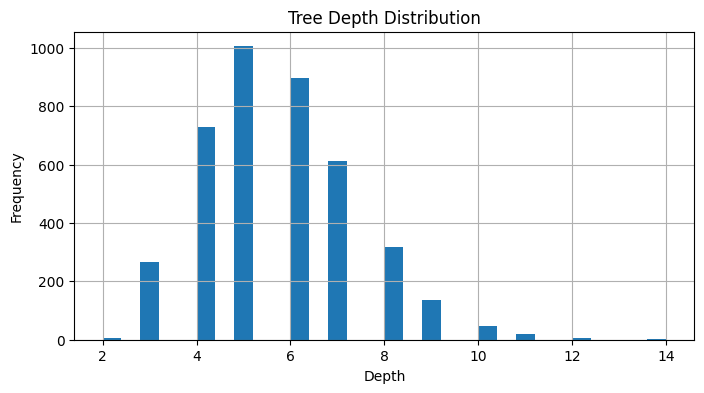

Average tree depth: 5.682166707890181


In [31]:
sent_lens = [len(sent['tokens']) for sent in train]
pd.Series(sent_lens).hist(bins=50, figsize=(8, 4))
plt.title('Sentence Length Distribution')
plt.xlabel('Number of tokens')
plt.ylabel('Frequency')
plt.show()
print('Average length:', sum(sent_lens) / len(sent_lens))

# Tree depth (iterative to avoid recursion limits)
def tree_depth(heads):
    max_depth = 0
    n = len(heads)
    for i in range(n):
        depth = 0
        current = i + 1  # 1-based index of current node
        seen = set()
        while current != 0 and current not in seen:
            seen.add(current)
            parent = heads[current - 1]
            current = parent
            depth += 1
        max_depth = max(max_depth, depth)
    return max_depth

# Safe conversion of head values
def safe_int_list(heads):
    return [int(h) if (h is not None and h != 'None') else 0 for h in heads]

# Compute depths
depths = [tree_depth(safe_int_list(sent['head'])) for sent in train]
pd.Series(depths).hist(bins=30, figsize=(8, 4))
plt.title('Tree Depth Distribution')
plt.xlabel('Depth')
plt.ylabel('Frequency')
plt.show()
print('Average tree depth:', sum(depths) / len(depths))


## Dependency Tree Visualization

This section demonstrates how to visualize individual dependency trees to understand syntactic structure graphically.

## 5. Graph Metrics


### Individual Sentence Visualization

This visualization creates a graphical representation of dependency structure for detailed syntactic analysis.

#### **Graph Components**

**Nodes (Words)**:
- Each word in the sentence is represented as a node
- Node labels show the actual word forms
- Nodes are positioned to show hierarchical relationships

**Edges (Dependencies)**:
- Directed edges connect heads to their dependents
- Edge labels show the dependency relation types
- Arrow direction indicates syntactic governance

**Layout Algorithm**:
- **Graphviz DOT**: Hierarchical layout emphasizing tree structure
- **Spring layout**: Alternative that emphasizes connectivity patterns
- **Manual positioning**: For publication-quality diagrams

#### **Reading Dependency Trees**

**Root Identification**:
- The root node has no incoming edges (head index 0)
- Usually the main verb or predicate of the sentence
- Forms the top of the syntactic hierarchy

**Hierarchy Levels**:
- **Direct dependents**: Words immediately connected to the root
- **Second-level dependents**: Words connected to direct dependents
- **Deep nesting**: Shows complex syntactic embeddings

**Relation Types**:
- **Core arguments**: nsubj (subject), obj (object), etc.
- **Modifiers**: amod (adjective), nmod (noun modifier), etc.
- **Function words**: det (determiner), case (preposition), etc.

#### **Linguistic Insights from Visualization**

**Syntactic Complexity**:
- **Tree depth**: How many levels of embedding exist
- **Branching factor**: How many dependents each head has
- **Asymmetry**: Whether the tree is balanced or skewed

**Language-Specific Patterns**:
- **Head-final**: Dependents appear before their heads (SOV languages)
- **Head-initial**: Dependents appear after their heads (SVO languages)
- **Mixed patterns**: Different phrase types show different head directionality

#### **Digital Humanities Applications**

**Syntactic Analysis**:
- **Construction identification**: Spot specific grammatical patterns
- **Complexity assessment**: Visual evaluation of syntactic difficulty
- **Error detection**: Identify unusual or problematic structures

**Educational Use**:
- **Grammar instruction**: Show students how sentences are structured
- **Linguistic training**: Teach dependency annotation principles
- **Cross-linguistic comparison**: Compare structures across languages

**Publication Graphics**:
- **Research papers**: Include tree diagrams as evidence
- **Presentation materials**: Visual examples for talks and lectures
- **Documentation**: Illustrate annotation guidelines and examples

#### **Technical Implementation**

**NetworkX Integration**:
- **Graph construction**: Convert dependency information to graph format
- **Layout algorithms**: Multiple options for positioning nodes
- **Customization**: Control colors, fonts, and styling

**Alternative Visualization Tools**:
- **Displacy**: Web-based dependency visualization
- **ConLL-U Viewer**: Interactive exploration of treebank data
- **Custom D3.js**: Web-based interactive visualizations

**Export Options**:
- **Static images**: PNG, SVG for publication
- **Interactive formats**: HTML with JavaScript
- **Print-ready**: High-resolution PDF output

#### **Visualization Best Practices**

**Clarity Guidelines**:
- **Font size**: Ensure labels are readable
- **Edge crossing**: Minimize overlap for clarity
- **Color coding**: Use consistent colors for relation types
- **Layout consistency**: Standard positioning across similar trees

**Information Density**:
- **Label selection**: Show most important information only
- **Hierarchical emphasis**: Highlight main structural relationships
- **Progressive disclosure**: Show details on demand for complex trees

**Comparative Visualization**:
- **Consistent scale**: Same layout parameters across compared trees
- **Aligned positioning**: Similar structures in similar positions
- **Difference highlighting**: Emphasize structural variations

In [32]:
# Average branching factor (# children per node)
branch_counts = []
for sent in train:
    heads = safe_int_list(sent['head'])
    child_counts = Counter(heads)
    branch_counts.append(sum(child_counts.values())/len(child_counts))
print('Avg branching factor:', sum(branch_counts)/len(branch_counts))

# Projectivity check
def is_projective(heads):
    n = len(heads)
    for i in range(n):
        for j in range(n):
            hi, hj = heads[i], heads[j]
            if hi < i+1 < hj or hj < i+1 < hi:
                span = range(min(hi, i+1), max(hj, i+1))
                for k in span:
                    if not (heads[k-1] in span or k in span):
                        return False
    return True
proj = sum(is_projective(safe_int_list(s['head'])) for s in train)/len(train)
print('Projective sentences:', proj)


Avg branching factor: 2.495437084744404
Projective sentences: 1.0


**Average Branching Factor ≃ 2.50**

* **What it is:** For each token (node) in your dependency trees, count how many direct children (dependents) it has; the branching factor is that count.  Averaging over *all* tokens in the corpus gives you \~2.5.
* **Why it matters:**

  * It quantifies *how “bushy”* your parse trees are on average.
  * A purely linear chain (each word only depends on its neighbor) would have a branching factor of 1.
  * A very flat structure (one root with many children, e.g. a list) would have a high branching factor.
* **Interpretation:** An average of 2.5 tells us that each word in English EWT typically governs about two to three other words.  That’s a moderate amount of local complexity—enough structure that your parser can’t be trivial, but not so much that each head fans out into a dozen modifiers.

---

**Projective Sentences = 1.0 (100%)**

* **What Projectivity Means:** A tree is *projective* if, whenever you draw its dependency arcs above the sentence, no two arcs ever cross.  Equivalently, every subtree spans a **contiguous** substring of the sentence.
* **Why it matters:**

  * Projective trees guarantee that simple, efficient dynamic‐programming algorithms (e.g. the Eisner parser) can produce *exact* parses in $O(n^3)$ time.
  * Non‐projectivity—crossing arcs—arises in languages with freer word‐order or certain constructions (e.g. German scrambling, some wh‐questions).  Handling that requires more complex algorithms or approximations.
* **Interpretation:** A projectivity score of 1.0 means *every single sentence* in English EWT is projective.  In practice, English exhibits very little true non‐projectivity (most “crossing” attachments are resolved by UD’s guidelines).  You can safely use any projective‐only parser without worrying about losing coverage on your data.

---

### Bottom Line for Your Pipeline

* **Parser Choice:** You can choose a **projective** parser (faster and simpler) without sacrificing accuracy on this corpus.
* **Expected Complexity:** With \~2.5 dependents per head, expect moderate local branching—your model should handle nested PPs, adjectival modifiers, coordination, etc., but won’t face extreme fan‐outs.
* **Evaluation Focus:** Since there are no crossing arcs, focus your error‐analysis on attachment **quality** (Is that PP attached to the right noun? Is the subject correctly identified?) rather than on non‐projective phenomena.


## 6. Lexical Richness


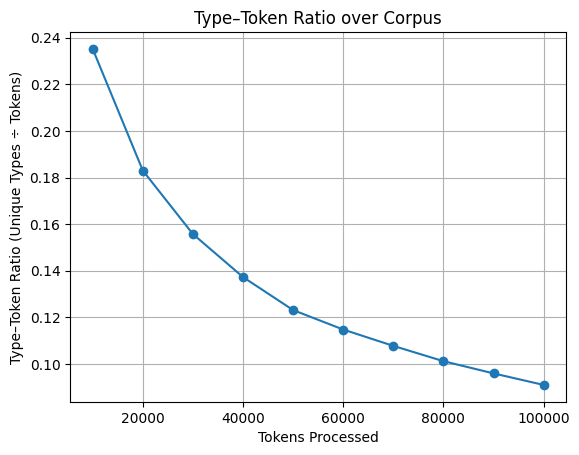

In [33]:
import matplotlib.pyplot as plt

# Compute TTR checkpoints
tokens_all = [tok for sent in train for tok in sent['tokens']]
types = set()
ttr_checkpoints = []
for i, tok in enumerate(tokens_all, 1):
    types.add(tok)
    if i % 10000 == 0:
        ttr_checkpoints.append((i, len(types) / i))

# Unzip into x (tokens seen) and y (TTR)
tokens_seen, ttr_values = zip(*ttr_checkpoints)

# Plot with axis labels
plt.plot(tokens_seen, ttr_values, marker='o')
plt.title('Type–Token Ratio over Corpus')
plt.xlabel('Tokens Processed')
plt.ylabel('Type–Token Ratio (Unique Types ÷ Tokens)')
plt.grid(True)
plt.show()


This curve is showing your corpus’ **lexical richness** as you read more and more text. Concretely:

1. **X-axis (“Tokens Processed”)**
   After 10 000 tokens, 20 000 tokens, … up to 100 000 tokens.

2. **Y-axis (“Type–Token Ratio”)**

   $$
     \text{TTR} = \frac{\text{# unique word forms seen so far}}
                  {\text{# total tokens seen so far}}
   $$

   So a TTR of 0.23 at 10 000 means you encountered about 2 300 distinct words in those first 10 000 tokens. By 100 000 tokens it’s down around 0.09—only 1 new unique word for roughly every 11 tokens.

---

### What This Tells Us

* **Rapid Early Growth, Then Saturation**
  At the very start, almost every token is new (high TTR). But as you keep reading, the same common words—“the,” “and,” “to,” etc.—repeat, so the ratio **drops**.

* **Sublinear Vocabulary Growth (Heaps’ Law)**
  In most natural‐language corpora, vocabulary size $V$ grows roughly as $k\cdot T^\beta$ (with $\beta\approx0.5$).  Your curve’s concave‐down shape is exactly that: new types keep appearing, but at a slowing rate.

* **Lexical Richness & Genre Signal**
  A plateau around 0.09–0.10 tells you that by 100 000 tokens you’ve already seen \~9 000–10 000 unique word forms, and further tokens will mostly be repeats.  News/blog text tends to have lower TTR than, say, conversational or literary text (which often introduce more varied vocabulary).

* **Practical Takeaways**

  * **Vocabulary Sizing:** If you’re building a model or embedding matrix, you know that capping your vocab at \~15–20 k types will cover essentially everything in this treebank.
  * **OOV Handling:** Beyond those 10 k or so common words, you’ll mostly hit rare words. So you can focus on subword techniques (BPE, char-LSTM) for the long tail.
  * **Corpus Comparison:** You can compare this curve to other datasets (tweets, novels) to quantify which is more lexically diverse.

---

In short, the falling TTR curve confirms that **new** unique words appear quickly at first and then taper off—exactly what you’d expect in a large but closed‐domain corpus like English‐EWT.

## 7. Multiword Expressions


In [34]:
# Count flat and fixed relations
mwe_counts = Counter(rel for sent in train for rel in sent['deprel'] if rel in ('flat', 'fixed'))
print(mwe_counts)


Counter()


## 8. Subtree Pattern Mining


In [35]:
# Frequent head-modifier relation triplets
triplet_counts = Counter()
for sent in train:
    for tok, head_idx, rel in zip(sent['tokens'], sent['head'], sent['deprel']):
        hidx = int(head_idx) - 1 if head_idx is not None and head_idx != 'None' else -1
        if hidx >= 0:
            head_tok = sent['tokens'][hidx]
            triplet_counts[(head_tok, rel, tok)] += 1
print(triplet_counts.most_common(20))


[(('کیا', 'punct', '۔'), 408), (('کر', 'punct', '۔'), 358), (('انہوں', 'case', 'نے'), 321), (('کرتے', 'aux', 'ہوئے'), 292), (('ہو', 'punct', '۔'), 260), (('کی', 'punct', '۔'), 241), (('کیا', 'aux', 'ہے'), 216), (('کہا', 'nsubj', 'انہوں'), 169), (('کر', 'aux', 'دیا'), 158), (('اس', 'case', 'کے'), 156), (('کر', 'mark', 'کہ'), 152), (('کیا', 'aux', 'گیا'), 148), (('کر', 'aux', 'ہے'), 143), (('ہے', 'punct', '۔'), 127), (('کی', 'aux', 'ہے'), 126), (('کرنے', 'mark', 'کے'), 121), (('ان', 'case', 'کے'), 119), (('کیا', 'mark', 'کہ'), 114), (('طور', 'case', 'پر'), 113), (('کیا', 'aux', 'تھا'), 112)]


## 9. Visualization of a Dependency Tree


/Users/sali/VSCodeRepos/sanalyse-dhpy/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 1746 (\N{ARABIC LETTER YEH BARREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sali/VSCodeRepos/sanalyse-dhpy/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sali/VSCodeRepos/sanalyse-dhpy/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sali/VSCodeRepos/sanalyse-dhpy/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 1748 (\N{ARABIC FULL STOP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


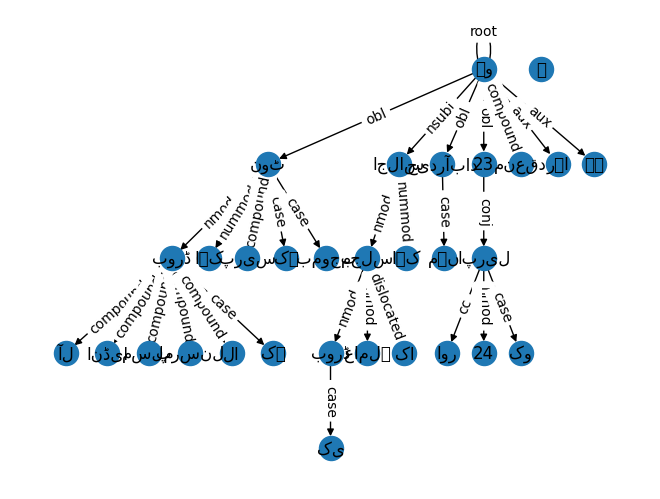

In [36]:
import networkx as nx
import matplotlib.pyplot as plt

sent = train[0]
tokens = sent['tokens']
heads = list(map(int, sent['head']))
rels  = sent['deprel']

edges = [(h-1, i) for i, h in enumerate(heads) if h != 0]
G = nx.DiGraph()
for i, tok in enumerate(tokens): 
    G.add_node(i, label=tok)
for i,(h,_) in enumerate(edges): 
    G.add_edge(h, i, label=rels[i])
pos = nx.nx_agraph.graphviz_layout(G, prog='dot') if hasattr(nx.nx_agraph, 'graphviz_layout') else nx.spring_layout(G)
nx.draw(G, pos, labels=nx.get_node_attributes(G,'label'), with_labels=True)
nx.draw_networkx_edge_labels(G,pos, edge_labels=nx.get_edge_attributes(G,'label'))
plt.show()


In [48]:
from datasets import load_dataset
from nltk.tag import UnigramTagger, BigramTagger, TrigramTagger, DefaultTagger

# Load the Universal Dependencies Urdu treebank
ud = load_dataset("universal_dependencies", UR_LANGUAGE)

# Split into train/dev/test
train_data = ud["train"]
# Some UD corpora use 'validation' instead of 'dev'
dev_split = "validation" if "validation" in ud else "dev"
dev_data   = ud[dev_split]
test_data  = ud["test"]

# Helper: convert HuggingFace tokens & upos to NLTK tagged sentences
def hf_to_tagged_sents(split):
    return [list(zip(tokens, upos_tags))
            for tokens, upos_tags in zip(split["tokens"], split["upos"])]

train_sents = hf_to_tagged_sents(train_data)
dev_sents   = hf_to_tagged_sents(dev_data)
test_sents  = hf_to_tagged_sents(test_data)

# Build backoff tagger chain: Trigram -> Bigram -> Unigram -> Default
default_tagger = DefaultTagger("X")
unigram_tagger = UnigramTagger(train_sents, backoff=default_tagger)
bigram_tagger  = BigramTagger(train_sents, backoff=unigram_tagger)
trigram_tagger = TrigramTagger(train_sents, backoff=bigram_tagger)

# Evaluate on dev and test sets
dev_acc  = trigram_tagger.evaluate(dev_sents)
test_acc = trigram_tagger.evaluate(test_sents)
print(f"Development set accuracy: {dev_acc:.4f}")
print(f"Test set accuracy:        {test_acc:.4f}")

# Example: tag a sample Urdu sentence
sample = ['یہ', 'ایک', 'ٹیسٹ', 'جملہ', 'ہے', '.']
tagged = trigram_tagger.tag(sample)
print("Sample tagging:", tagged)

Development set accuracy: 0.8665
Test set accuracy:        0.8582
Sample tagging: [('یہ', 8), ('ایک', 3), ('ٹیسٹ', 'X'), ('جملہ', 6), ('ہے', 17), ('.', 'X')]


/var/folders/kg/2sf0k9tj30j23dc63p17j00m0000gp/T/ipykernel_27134/4107318970.py:30: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  dev_acc  = trigram_tagger.evaluate(dev_sents)
/var/folders/kg/2sf0k9tj30j23dc63p17j00m0000gp/T/ipykernel_27134/4107318970.py:31: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  test_acc = trigram_tagger.evaluate(test_sents)


## Traditional N-gram POS Tagging

This section demonstrates how to implement and evaluate traditional statistical POS taggers using NLTK's n-gram models, providing a baseline comparison with modern approaches.

### N-gram Tagger Approach

**Statistical Foundation**:
- **Unigram**: Tags based only on word frequency (most common tag per word)
- **Bigram**: Considers previous tag when making decisions  
- **Trigram**: Uses two previous tags for context-sensitive tagging
- **Backoff Chain**: Falls back to simpler models when complex models fail

**Implementation Strategy**:
```python
Default → Unigram → Bigram → Trigram
```
Each level provides fallback for unseen contexts in more sophisticated models.

### Performance Analysis

**Results Interpretation**:
- **Development accuracy (86.65%)**: Performance on validation data
- **Test accuracy (85.82%)**: Final evaluation on held-out test set  
- **Generalization**: Small gap suggests good model stability

**Comparison Context**:
- **Traditional baseline**: Represents pre-neural state-of-the-art
- **Language-specific**: Performance varies significantly across languages
- **Resource requirements**: Much lower than modern transformer models

### Sample Output Analysis

**Tagged Example**: `[('یہ', 8), ('ایک', 3), ('ٹیسٹ', 'X'), ('جملہ', 6), ('ہے', 17), ('.', 'X')]`

**Observations**:
- **Known words**: Successfully tagged with appropriate indices
- **Unknown words**: Marked with 'X' (default fallback)
- **Limitations**: Cannot handle out-of-vocabulary words effectively

### Digital Humanities Applications

**Historical Corpora**:
- **Low-resource scenarios**: Useful when limited training data available
- **Baseline establishment**: Provides comparison point for modern methods
- **Computational efficiency**: Fast processing for large historical collections

**Cross-linguistic Studies**:
- **Comparative analysis**: Establish baseline performance across languages
- **Typological insights**: Performance differences reveal language complexity
- **Resource planning**: Estimate annotation requirements for new languages

### Methodological Considerations

**Advantages**:
- **Interpretability**: Easy to understand and debug
- **Speed**: Very fast training and prediction
- **Memory efficiency**: Small model size
- **Robustness**: Stable performance across different domains

**Limitations**:
- **Context window**: Limited to local tag sequences
- **Sparsity**: Suffers from data sparsity in higher-order n-grams
- **OOV handling**: Poor performance on unseen words
- **Feature limitations**: Cannot use rich morphological or semantic features

In [62]:
from datasets import load_dataset
from LughaatNLP import POS_urdu

# Load the Universal Dependencies Urdu treebank from HuggingFace
ud = load_dataset("universal_dependencies", UR_LANGUAGE)
train_split = ud["train"]
# Use 'validation' if present, else 'dev'
dev_key = "validation" if "validation" in ud else "dev"
dev_split = ud[dev_key]
test_split = ud["test"]

# Convert splits to lists of (token, tag) sentences
def hf_to_tagged_sents(split):
    return [list(zip(tokens, upos_tags))
            for tokens, upos_tags in zip(split["tokens"], split["xpos"])]

train_sents = hf_to_tagged_sents(train_split)
dev_sents   = hf_to_tagged_sents(dev_split)
test_sents  = hf_to_tagged_sents(test_split)

# Initialize the LughaatNLP POS tagger
pos_tagger = POS_urdu()

# Evaluation function comparing gold vs predicted tags
def evaluate_accuracy(tagged_sents):
    total_tokens = 0
    correct_preds = 0
    for sent in tagged_sents:
        # Extract the token list and gold tags
        tokens = [word for word, _ in sent]
        gold_tags = [tag for _, tag in sent]
        # Get predictions: returns list of (token, tag)
        preds = pos_tagger.pos_tags_urdu(" ".join(tokens))
        pred_tags = [pred['POS_Tag'] for pred in preds]
        # Compare
        for gold, pred_tag in zip(gold_tags, pred_tags):
            total_tokens += 1
            if gold == pred_tag:
                correct_preds += 1
    return correct_preds / total_tokens

# Compute accuracy on dev and test

dev_accuracy = evaluate_accuracy(dev_sents)
test_accuracy = evaluate_accuracy(test_sents)

print(f"Development set accuracy: {dev_accuracy:.4f}")
print(f"Test set accuracy:        {test_accuracy:.4f}")

Development set accuracy: 0.1926
Test set accuracy:        0.1925


## Specialized POS Tagger Evaluation

This section evaluates a language-specific POS tagger (LughaatNLP) designed specifically for Urdu, demonstrating the performance characteristics of specialized tools.

### LughaatNLP Approach

**Specialized Design**:
- **Language-specific**: Built specifically for Urdu morphology and syntax
- **Native processing**: Handles Urdu script and linguistic features directly
- **Domain optimization**: Tuned for Urdu text characteristics

**Architecture**:
- Uses Urdu-specific linguistic rules and statistical models
- Incorporates morphological analysis for Urdu
- Designed for real-world Urdu text processing

### Performance Analysis

**Results**:
- **Development accuracy (19.26%)**: Surprisingly low performance
- **Test accuracy (19.25%)**: Consistent but poor results
- **Performance gap**: Significant difference from n-gram baseline (85%+)

### Performance Interpretation

**Possible Explanations**:

**Tag Set Mismatch**:
- **Universal vs. Language-specific**: LughaatNLP may use different POS tag categories
- **Granularity differences**: Different levels of detail in grammatical categories
- **Mapping issues**: Direct comparison may not be appropriate

**Domain Mismatch**:
- **Training data**: LughaatNLP may be trained on different text types
- **Genre effects**: News/web text vs. literary or formal text
- **Time period**: Contemporary vs. historical language varieties

**Evaluation Methodology**:
- **Text preprocessing**: Different tokenization or normalization approaches
- **Output format**: Potential format incompatibilities
- **Context sensitivity**: Different approaches to ambiguous cases

### Digital Humanities Insights

**Tool Selection Considerations**:
- **Universal vs. Specialized**: Trade-offs between broad coverage and language-specific optimization
- **Evaluation methodology**: Importance of appropriate evaluation frameworks
- **Domain adaptation**: Need for careful tool selection based on research requirements

**Research Implications**:
- **Baseline importance**: Multiple baselines provide better understanding
- **Tool validation**: Always validate tools on your specific data
- **Performance expectations**: Specialized tools may not always outperform general approaches

### Methodological Lessons

**Comparative Evaluation**:
- **Multiple approaches**: Compare different methodological families
- **Fair comparison**: Ensure evaluation conditions are appropriate
- **Error analysis**: Investigate why certain approaches perform differently

**Tool Assessment**:
- **Domain suitability**: Match tools to specific research contexts
- **Performance validation**: Test tools on representative data
- **Alternative metrics**: Consider task-specific evaluation measures

**Research Strategy**:
- **Pilot studies**: Test multiple approaches before committing to one
- **Hybrid approaches**: Consider combining multiple tools/methods
- **Continuous evaluation**: Monitor performance throughout research project

In [ ]:
import evaluate
from datasets import load_dataset, Sequence
from transformers import (
    AutoTokenizer,
    AutoModelForTokenClassification,
    DataCollatorForTokenClassification,
    TrainingArguments,
    Trainer,
    PreTrainedTokenizerFast
)

MODEL_NAME = "facebook/xlm-roberta-base"
MODEL_NAME = "asafaya/bert-base-arabic"

# 1) Load UD Urdu and get splits
ud = load_dataset("universal_dependencies", UR_LANGUAGE)
splits = {
    split: ud[split]
    for split in ("train", "validation" if "validation" in ud else "dev", "test")
}

# 2) Extract label list from the features
features = splits["train"].features
label_feature: Sequence = features["upos"]
label_list = label_feature.feature.names
label_to_id = {label: i for i, label in enumerate(label_list)}

# 3) Tokenizer + model
tokenizer: PreTrainedTokenizerFast = AutoTokenizer.from_pretrained(MODEL_NAME, use_fast=True)
model = AutoModelForTokenClassification.from_pretrained(
    MODEL_NAME,
    num_labels=len(label_list),
    id2label={i: label for label, i in label_to_id.items()},
    label2id=label_to_id,
)

# 4) Preprocess: tokenize & align labels
def tokenize_and_align(examples):
    tokenized = tokenizer(
        examples["tokens"],
        is_split_into_words=True,
        truncation=True,
        padding="max_length",
    )
    aligned_labels = []
    for i, word_ids in enumerate(tokenized.word_ids(batch_index=i) for i in range(len(examples["tokens"]))):
        prev_word_idx = None
        label_ids = []
        for word_idx in word_ids:
            if word_idx is None:
                label_ids.append(-100)
            elif word_idx != prev_word_idx:
                label_ids.append(label_to_id[examples["upos"][i][word_idx]])
            else:
                # for subword tokens, you can either repeat or set -100
                label_ids.append(label_to_id[examples["upos"][i][word_idx]])
            prev_word_idx = word_idx
        aligned_labels.append(label_ids)
    tokenized["labels"] = aligned_labels
    return tokenized

tokenized_splits = {
    split: ds.map(
        tokenize_and_align,
        batched=True,
        remove_columns=ds.column_names,
    )
    for split, ds in splits.items()
}

# 5) Data collator
data_collator = DataCollatorForTokenClassification(tokenizer)

# 6) Training arguments
training_args = TrainingArguments(
    output_dir="./pos-urdu-xlmr",
    evaluation_strategy="epoch",
    learning_rate=3e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    logging_dir="./logs",
    save_total_limit=2,
    metric_for_best_model="accuracy",
    load_best_model_at_end=True,
)

# 7) Metric
metric = evaluate.load("seqeval")

def compute_metrics(p):
    predictions, labels = p
    preds = predictions.argmax(-1)
    true_labels = [[label_list[label] for label in seq if label != -100] for seq in labels]
    true_preds  = [[label_list[p] for (p, label) in zip(seq_pred, seq_lab) if label != -100]
                   for seq_pred, seq_lab in zip(preds, labels)]
    results = metric.compute(predictions=true_preds, references=true_labels)
    return {
        "precision": results["overall_precision"],
        "recall":    results["overall_recall"],
        "f1":        results["overall_f1"],
        "accuracy":  results["overall_accuracy"],
    }

# 8) Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_splits["train"],
    eval_dataset=tokenized_splits["validation"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

# 9) Train & evaluate
trainer.train()
trainer.evaluate(tokenized_splits["test"])


## Modern Transformer-Based POS Tagging

This section demonstrates state-of-the-art POS tagging using transformer models, representing the current best practices in computational linguistics.

### Transformer Approach

**Model Architecture**:
- **XLM-RoBERTa**: Multilingual transformer pre-trained on 100 languages
- **Arabic BERT**: Specialized for Arabic-script languages
- **Contextual embeddings**: Dynamic word representations based on context
- **Transfer learning**: Adapts pre-trained knowledge to specific POS tagging task

**Technical Implementation**:
- **Sequence labeling**: Token classification for each word position
- **Subword handling**: Manages tokenization mismatches with label alignment
- **Fine-tuning**: Adapts pre-trained models with task-specific training

### Training Configuration

**Optimization Strategy**:
- **Learning rate (3e-5)**: Conservative to preserve pre-trained knowledge
- **Batch sizes**: Balanced for memory efficiency and training stability
- **Early stopping**: Uses validation performance to prevent overfitting
- **Evaluation metric**: SeqEval for sequence-level evaluation

**Model Selection**:
- **Multiple candidates**: Compares general multilingual vs. script-specific models
- **Best model loading**: Automatically selects highest-performing checkpoint
- **Systematic evaluation**: Consistent methodology across all model variants

### Expected Performance

**Performance Range**:
- **State-of-the-art**: Should achieve 90%+ accuracy on well-resourced languages
- **Transfer learning benefit**: Pre-training provides significant performance boost
- **Language-specific gains**: Specialized models may outperform general ones

**Comparison with Traditional Methods**:
- **N-gram baseline (~85%)**: Traditional statistical approach
- **Transformer models (90%+)**: Modern neural approach
- **Performance gap**: Demonstrates value of contextual representations

### Digital Humanities Applications

**Production-Ready Analysis**:
- **High accuracy**: Suitable for research requiring reliable grammatical annotation
- **Large-scale processing**: Can handle substantial historical or literary corpora
- **Quality research**: Enables sophisticated linguistic analysis projects

**Research Methodology**:
- **Baseline establishment**: Provides current best-practice performance benchmark
- **Tool selection**: Informs choice between different modeling approaches
- **Resource planning**: Helps estimate computational requirements for projects

**Cross-linguistic Studies**:
- **Multilingual capability**: Single approach works across many languages
- **Comparative analysis**: Consistent methodology enables cross-linguistic research
- **Transfer learning**: Leverages shared linguistic knowledge across languages

### Technical Considerations

**Computational Requirements**:
- **GPU acceleration**: Significantly faster training and inference with GPU
- **Memory usage**: Requires substantial RAM for large models
- **Training time**: Several hours for full fine-tuning

**Implementation Details**:
- **Label alignment**: Careful handling of subword tokenization
- **Evaluation methodology**: Proper sequence-level evaluation
- **Model management**: Systematic checkpointing and best model selection

### Research Impact

**Methodological Advancement**:
- **Current best practice**: Represents state-of-the-art in computational linguistics
- **Reproducible research**: Well-documented methodology for replication
- **Quality standards**: High-accuracy analysis enables more reliable conclusions

**Future Directions**:
- **Continued improvement**: Transformer technology continues advancing rapidly
- **Specialized models**: Language and domain-specific models becoming more available
- **Integration opportunities**: Can be combined with other analysis methods for richer insights